In [1]:
import glob
import chess_SL_E1_lib as lib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import chess
import numpy as np

In [2]:
path = "../Data/DataTrain"
csv_files1 = glob.glob(f'{path}/Chess_Jan_a*') + glob.glob(f'{path}/Chess_Jan_b*')
csv_files2 = glob.glob(f'{path}/Chess_Jan_c*') + glob.glob(f'{path}/Chess_Jan_d*')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Models Trained
- V1 -> 
- V2 -> 
- V3 -> 
- V4 -> 

- E1 -> Epochs: 200, SGD(Learning Rate: 0.030, Momentum = 0.9), Loss: L1Loss, Training: "a*", Validation: "a*"
- E2 -> Epochs: 200, SGD(Learning Rate: 0.035, Momentum = 0.9), Loss: L1Loss, Training: "a*", Validation: "b*"
- E3 -> Epochs: 75, SGD(Learning Rate: 0.035, Mometum = 0.9), Loss: L1Loss, Training: "a|b*", Validation: "c|d*"

In [3]:
# Create a dataset
dataset1 = lib.ChessIterableDataset(csv_files1, chunksize = 50000)
dataset2 = lib.ChessIterableDataset(csv_files2, chunksize = 50000)

# Create a data loader
train_data_loader = DataLoader(dataset1, batch_size = 500)
val_data_loader = DataLoader(dataset2, batch_size = 500)

# Create a model
model = lib.EvalNet()
model = model.to(device)

criterion = nn.L1Loss() # nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.035, momentum=0.9)

# Train the model
lib.train(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=200)


Begin Training!
Epoch 1/200, Training Loss: 2.7676075715548842, Validation Loss: 2.5176174974635788
Epoch 2/200, Training Loss: 2.2872633477684334, Validation Loss: 2.218167295615825
Epoch 3/200, Training Loss: 2.192606104704274, Validation Loss: 2.132317631082526
Epoch 4/200, Training Loss: 3.469033792450787, Validation Loss: 3.1972115200091142
Epoch 5/200, Training Loss: 3.1247265212684687, Validation Loss: 2.9116458518121804
Epoch 6/200, Training Loss: 2.824216780602713, Validation Loss: 2.920916088320028
Epoch 7/200, Training Loss: 2.709719335179288, Validation Loss: 2.584086117121315
Epoch 8/200, Training Loss: 2.46775723981011, Validation Loss: 2.226698105516795
Epoch 9/200, Training Loss: 2.272458721950851, Validation Loss: 2.1754079366021677
Epoch 10/200, Training Loss: 2.2152233709611973, Validation Loss: 2.153930285514167
Epoch 11/200, Training Loss: 2.197956992844473, Validation Loss: 2.125137890666602
Epoch 12/200, Training Loss: 2.1752239973483793, Validation Loss: 2.20378

In [4]:
torch.save(model, 'model_E2.pth')

In [5]:
model_loaded = torch.load('model_E2.pth')

In [6]:
board = chess.Board()

b1c3


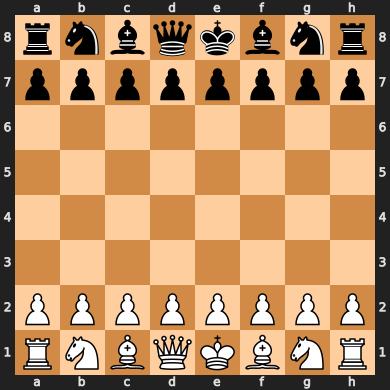

In [7]:
move = lib.predict(model_loaded, board.fen())
print(move)
board

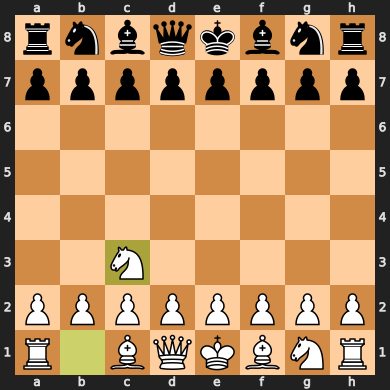

In [8]:
board.push_uci(move)
board

In [9]:
# TODO : make prediction function
# TODO : speed up